In [16]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from torch.utils import data

In [17]:
# 生成基于sin的序列数据
T = 1000
time = torch.arange(1, T + 1, dtype=torch.float32)
time

tensor([   1.,    2.,    3.,    4.,    5.,    6.,    7.,    8.,    9.,   10.,
          11.,   12.,   13.,   14.,   15.,   16.,   17.,   18.,   19.,   20.,
          21.,   22.,   23.,   24.,   25.,   26.,   27.,   28.,   29.,   30.,
          31.,   32.,   33.,   34.,   35.,   36.,   37.,   38.,   39.,   40.,
          41.,   42.,   43.,   44.,   45.,   46.,   47.,   48.,   49.,   50.,
          51.,   52.,   53.,   54.,   55.,   56.,   57.,   58.,   59.,   60.,
          61.,   62.,   63.,   64.,   65.,   66.,   67.,   68.,   69.,   70.,
          71.,   72.,   73.,   74.,   75.,   76.,   77.,   78.,   79.,   80.,
          81.,   82.,   83.,   84.,   85.,   86.,   87.,   88.,   89.,   90.,
          91.,   92.,   93.,   94.,   95.,   96.,   97.,   98.,   99.,  100.,
         101.,  102.,  103.,  104.,  105.,  106.,  107.,  108.,  109.,  110.,
         111.,  112.,  113.,  114.,  115.,  116.,  117.,  118.,  119.,  120.,
         121.,  122.,  123.,  124.,  125.,  126.,  127.,  128., 

In [18]:
x = torch.sin(0.01 * time) + torch.normal(0, 0.2, (T,))
x

tensor([ 1.5282e-01, -6.9875e-02,  1.7085e-02, -3.1667e-01, -9.4640e-03,
        -2.7073e-03, -2.1334e-01, -8.4254e-02, -2.0993e-02,  6.5024e-02,
         9.3942e-02,  1.9049e-01, -7.0148e-02,  2.8448e-01,  4.4951e-01,
         2.4702e-01, -2.0148e-01, -3.2769e-01,  1.8016e-01, -1.4117e-01,
         2.8366e-01,  3.9249e-01,  1.7753e-01,  4.2728e-01,  2.8885e-01,
         1.8030e-01,  3.0940e-01,  1.0714e-01,  5.5689e-01,  4.1405e-01,
         4.4140e-01,  3.2543e-01,  4.2781e-01,  5.3047e-01,  3.9631e-01,
         4.4622e-01,  7.5824e-01,  5.1923e-01,  5.0026e-01,  2.7733e-01,
         5.8341e-01,  1.7376e-01,  2.9299e-02,  2.1617e-01,  3.8178e-01,
         5.7629e-01,  4.4425e-01,  7.9493e-02,  1.8797e-01,  2.8411e-01,
         7.3546e-01,  9.3055e-01,  5.8704e-01,  4.8531e-01,  3.1607e-01,
         4.8906e-01,  3.4335e-01,  7.6890e-01,  5.0854e-01,  3.7967e-01,
         4.6432e-01,  5.8244e-01,  8.7880e-01,  7.1720e-01,  6.4274e-01,
         6.2270e-01,  9.9192e-01,  8.8050e-01,  6.9

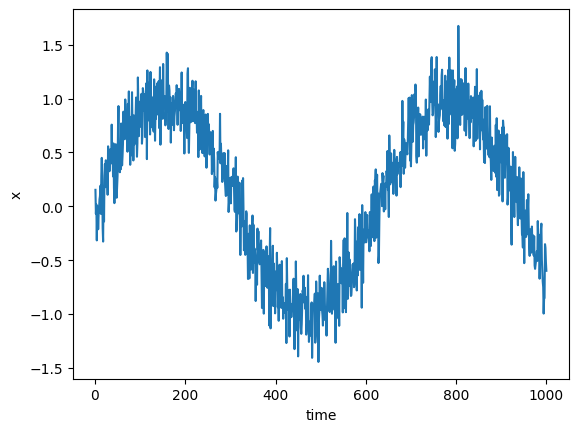

In [19]:
plt.xlabel("time")
plt.ylabel("x")
plt.plot(time, x)

In [20]:
# 基于序列数据生成，训练数据
"""
例如x=[1,2,3,4,5,6,,,1000]
features[0]=[1,2,3,4],labels[0]=5
features[1]=[2,3,4,5],labels[1]=6
"""
tau = 4
features = torch.zeros((T - tau, tau))
print(features.shape)
for i in range(tau):
    features[:, i] = x[i: T - tau + i]
labels = x[tau:].reshape((-1, 1))

torch.Size([996, 4])


In [21]:
features

tensor([[ 0.1528, -0.0699,  0.0171, -0.3167],
        [-0.0699,  0.0171, -0.3167, -0.0095],
        [ 0.0171, -0.3167, -0.0095, -0.0027],
        ...,
        [-0.9962, -0.8560, -0.8523, -0.3518],
        [-0.8560, -0.8523, -0.3518, -0.3868],
        [-0.8523, -0.3518, -0.3868, -0.5183]])

In [22]:
labels

tensor([[-9.4640e-03],
        [-2.7073e-03],
        [-2.1334e-01],
        [-8.4254e-02],
        [-2.0993e-02],
        [ 6.5024e-02],
        [ 9.3942e-02],
        [ 1.9049e-01],
        [-7.0148e-02],
        [ 2.8448e-01],
        [ 4.4951e-01],
        [ 2.4702e-01],
        [-2.0148e-01],
        [-3.2769e-01],
        [ 1.8016e-01],
        [-1.4117e-01],
        [ 2.8366e-01],
        [ 3.9249e-01],
        [ 1.7753e-01],
        [ 4.2728e-01],
        [ 2.8885e-01],
        [ 1.8030e-01],
        [ 3.0940e-01],
        [ 1.0714e-01],
        [ 5.5689e-01],
        [ 4.1405e-01],
        [ 4.4140e-01],
        [ 3.2543e-01],
        [ 4.2781e-01],
        [ 5.3047e-01],
        [ 3.9631e-01],
        [ 4.4622e-01],
        [ 7.5824e-01],
        [ 5.1923e-01],
        [ 5.0026e-01],
        [ 2.7733e-01],
        [ 5.8341e-01],
        [ 1.7376e-01],
        [ 2.9299e-02],
        [ 2.1617e-01],
        [ 3.8178e-01],
        [ 5.7629e-01],
        [ 4.4425e-01],
        [ 7

In [23]:
def load_array(data_arrays, batch_size, is_train=True):
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

In [24]:
# 初始化⽹络权重的函数
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.xavier_uniform_(m.weight)


# 多层感知机
def get_net():
    net = nn.Sequential(nn.Linear(4, 10), nn.ReLU(), nn.Linear(10, 1))
    net.apply(init_weights)
    return net


# 平⽅损失。注意： MSELoss计算平⽅误差时不带系数1/2
loss = nn.MSELoss(reduction='none')

In [25]:
# 只有前n_train个样本⽤于训练
# 这里只用前600个数据进行训练
batch_size, n_train = 16, 600
train_iter = load_array((features[:n_train], labels[:n_train]), batch_size, is_train=True)

In [26]:
class Accumulator:
    def __init__(self, n):
        self.data = [0.0] * n

    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]

    def reset(self):
        self.data = [0.0] * len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

reduce_sum = lambda x, *args, **kwargs: x.sum(*args, **kwargs)

def evaluate_loss(net, data_iter, loss):
    metric = Accumulator(2)
    for X, y in data_iter:
        out = net(X)
        y = torch.reshape(y, out.shape)
        l = loss(out, y)
        metric.add(reduce_sum(l), len(y))
    return metric[0] / metric[1]

In [27]:
def train(net, train_iter, loss, epochs, lr):
    trainer = torch.optim.Adam(net.parameters(), lr)
    for epoch in range(epochs):
        for X, y in train_iter:
            trainer.zero_grad()
            l = loss(net(X), y)
            l.sum().backward()
            trainer.step()
        print(f'epoch {epoch + 1}, 'f'loss: {evaluate_loss(net, train_iter, loss):f}')

In [28]:
net = get_net()
train(net, train_iter, loss, 5, 0.01)

epoch 1, loss: 0.058113
epoch 2, loss: 0.053032
epoch 3, loss: 0.058129
epoch 4, loss: 0.049609
epoch 5, loss: 0.050350


In [29]:
# 预测
# 单步预测
onestep_preds = net(features)
onestep_preds

tensor([[-0.0826],
        [-0.0892],
        [-0.0621],
        [-0.1676],
        [-0.0843],
        [-0.0721],
        [-0.0498],
        [ 0.0175],
        [ 0.0844],
        [ 0.0414],
        [ 0.1224],
        [ 0.2349],
        [ 0.2138],
        [ 0.1183],
        [-0.0213],
        [-0.0014],
        [-0.1052],
        [ 0.0174],
        [ 0.2014],
        [ 0.1621],
        [ 0.3021],
        [ 0.2954],
        [ 0.2284],
        [ 0.2751],
        [ 0.1901],
        [ 0.2943],
        [ 0.3315],
        [ 0.3536],
        [ 0.3852],
        [ 0.3722],
        [ 0.4098],
        [ 0.3827],
        [ 0.4117],
        [ 0.5169],
        [ 0.4832],
        [ 0.4981],
        [ 0.4394],
        [ 0.4451],
        [ 0.3276],
        [ 0.1969],
        [ 0.2209],
        [ 0.2123],
        [ 0.3157],
        [ 0.3773],
        [ 0.2979],
        [ 0.2669],
        [ 0.2368],
        [ 0.3527],
        [ 0.5410],
        [ 0.5695],
        [ 0.5941],
        [ 0.4949],
        [ 0.

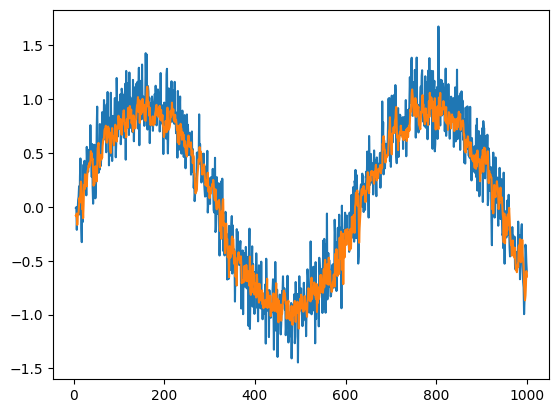

In [30]:
# 可以发现即使只用了前600个数据进行训练，在600之后的预测也能符合趋势
plt.plot(time[tau:],x[tau:])
plt.plot(time[tau:],onestep_preds.reshape(-1).detach())

In [31]:
# 多步预测
multistep_preds = torch.zeros(T)
# 用前604个数据进行赋值
multistep_preds[: n_train + tau] = x[: n_train + tau]
multistep_preds

tensor([ 0.1528, -0.0699,  0.0171, -0.3167, -0.0095, -0.0027, -0.2133, -0.0843,
        -0.0210,  0.0650,  0.0939,  0.1905, -0.0701,  0.2845,  0.4495,  0.2470,
        -0.2015, -0.3277,  0.1802, -0.1412,  0.2837,  0.3925,  0.1775,  0.4273,
         0.2888,  0.1803,  0.3094,  0.1071,  0.5569,  0.4141,  0.4414,  0.3254,
         0.4278,  0.5305,  0.3963,  0.4462,  0.7582,  0.5192,  0.5003,  0.2773,
         0.5834,  0.1738,  0.0293,  0.2162,  0.3818,  0.5763,  0.4442,  0.0795,
         0.1880,  0.2841,  0.7355,  0.9306,  0.5870,  0.4853,  0.3161,  0.4891,
         0.3433,  0.7689,  0.5085,  0.3797,  0.4643,  0.5824,  0.8788,  0.7172,
         0.6427,  0.6227,  0.9919,  0.8805,  0.6944,  0.7898,  0.7360,  0.5068,
         0.9514,  0.6647,  1.0666,  0.6441,  0.8322,  0.3854,  0.6795,  0.4731,
         0.6168,  1.0594,  0.7326,  0.8237,  0.4257,  0.8442,  0.5724,  0.6624,
         0.7584,  0.8241,  1.0101,  0.6624,  0.4603,  0.5869,  1.1965,  0.9555,
         0.6509,  0.9380,  0.8901,  0.74

In [32]:
# 让605=net(604~601)
# 606=net(605~602)
# 即用预测作为下次预测的输入
for i in range(n_train + tau, T):
    # print(multistep_preds[i - tau:i].reshape((1, -1)))
    multistep_preds[i] = net(multistep_preds[i - tau:i].reshape((1, -1)))

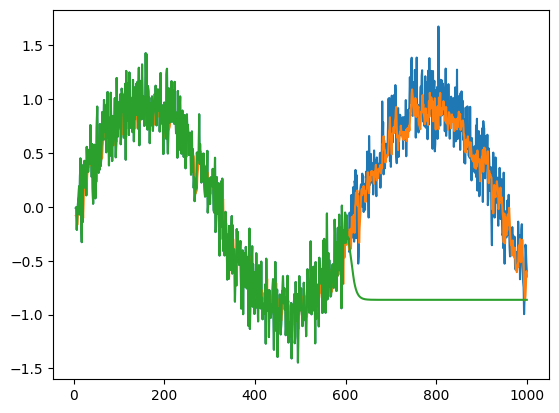

In [33]:
plt.plot(time[tau:],x[tau:])
plt.plot(time[tau:],onestep_preds.reshape(-1).detach())
plt.plot(time[tau:],multistep_preds.reshape(-1).detach()[tau:])

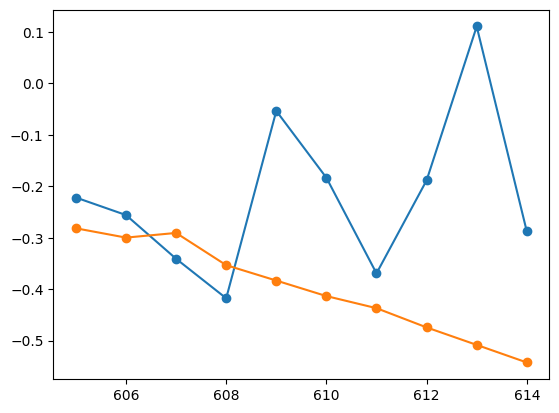

In [43]:
# 605-608较为符合
plt.plot(time[n_train + tau:n_train + tau+10],x[n_train + tau:n_train + tau+10],marker="o")
plt.plot(time[n_train + tau:n_train + tau+10],multistep_preds.reshape(-1).detach()[n_train + tau:n_train + tau+10],marker="o")